In [76]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
datos=pd.read_csv('mercado_mod.csv')

In [20]:
datos.head()

,Unnamed: 0,categoria,item,precio
0,0,catalogos,clar n anuario de autos 2019,449.9
1,1,catalogos,catalogo de arte 90 a os de la facultad de teo...,135.0
2,2,catalogos,catalogo de ropa interior lody 2019 nuevo,190.0
3,3,catalogos,cat logo de arte rupestre jujuy y su regi n ...,499.0
4,4,catalogos,catalogo de pinturas al oleo artistas famosos,299.0


In [21]:
datos=datos[['categoria','item']]

In [36]:
datos.head()

,categoria,item
0,catalogos,clar n anuario de autos 2019
1,catalogos,catalogo de arte 90 a os de la facultad de teo...
2,catalogos,catalogo de ropa interior lody 2019 nuevo
3,catalogos,cat logo de arte rupestre jujuy y su regi n ...
4,catalogos,catalogo de pinturas al oleo artistas famosos


In [73]:
def count_chars(column_df):
    ls=[]
    for i in column_df:
        if str(i).split(" ") not in ls:

            ls.extend(str(i).split(" "))
    return len(set(ls))

In [74]:
maxim=count_chars(datos['item'])

In [75]:
maxim

8088

In [31]:
token=Tokenizer(num_words=maxim,split=' ')
token.fit_on_texts(datos['item'].values)
x=token.texts_to_sequences(datos['item'].values)
x=pad_sequences(x)

In [68]:
lis=[x for x in datos['categoria']]
Y=LabelEncoder()
Y=Y.fit(np.asarray(lis))
Y=Y.transform(np.asarray(lis))

In [69]:
clases={}
for i in range(len(Y)):
    clases[Y[i]]=lis[i]
print(len(Y))

5400


In [94]:
clases

{0: 'catalogos',
 1: 'comics-historietas',
 2: 'libros',
 3: 'manga',
 5: 'revistas',
 4: 'otros'}

In [70]:
Y=Y.reshape(Y.shape[0],1).astype('float32')
len(Y)

5400

In [71]:

y=OneHotEncoder(categorical_features=[0])
y=y.fit_transform(Y).toarray()
y

C:\Users\Stalker\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=55)


In [98]:
y.shape[1]

6

In [100]:
model=Sequential()
model.add(Embedding(maxim,104,input_length=x.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(90,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(6,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [101]:
historial=model.fit(x_train,y_train,epochs=15,batch_size=55)

Epoch 1/15
4050/4050 [==============================] - 9s 2ms/step - loss: 1.6337 - acc: 0.3346
Epoch 2/15
4050/4050 [==============================] - 6s 2ms/step - loss: 0.9698 - acc: 0.6514
Epoch 3/15
4050/4050 [==============================] - 6s 2ms/step - loss: 0.6095 - acc: 0.7993
Epoch 4/15
4050/4050 [==============================] - 6s 2ms/step - loss: 0.4135 - acc: 0.8625
Epoch 5/15
4050/4050 [==============================] - 6s 2ms/step - loss: 0.2932 - acc: 0.9114A: 0s - loss: 0.2966 - ac
Epoch 6/15
4050/4050 [==============================] - 6s 2ms/step - loss: 0.2138 - acc: 0.9402
Epoch 7/15
4050/4050 [==============================] - 6s 2ms/step - loss: 0.1557 - acc: 0.9516A: 2s - 
Epoch 8/15
4050/4050 [==============================] - 7s 2ms/step - loss: 0.1271 - acc: 0.9595
Epoch 9/15
4050/4050 [==============================] - 7s 2ms/step - loss: 0.0986 - acc: 0.9691
Epoch 10/15
4050/4050 [==============================] - 7s 2ms/step - loss: 0.0919 - acc: 0.9

In [102]:
evalue=model.evaluate(x_test,y_test)

1350/1350 [==============================] - 1s 679us/step


In [104]:
print('score:',evalue[0],'acc:',evalue[1])

score: 0.8033165768340782 acc: 0.7814814815697847


In [112]:
while True:
    
    predict=input("que desea vender? : ")
    words=token.texts_to_sequences([predict])
    words=pad_sequences(words,maxlen=x.shape[1],dtype='int32',value=0)
    print(clases[int(model.predict_classes(words))])
    if predict == 'romper':
        break

que desea vender? : catalogo muñequitos de los power rangers
catalogos
que desea vender? : libro de cocina vegana
libros
que desea vender? : avengers n 1 
comics-historietas
que desea vender? : comic,los vengadores en chino
comics-historietas
que desea vender? : los vengadores idima chino
comics-historietas
que desea vender? : viñetas eculturadas n 1
comics-historietas
que desea vender? : lalalala
otros
que desea vender? : leo leo lolo
otros
que desea vender? : papa
otros
que desea vender? : El alfarero de troya tomo 1
manga
que desea vender? : historias del mas alla
otros
que desea vender? : el quijote
otros
que desea vender? : el quijote completo en castellano
comics-historietas
que desea vender? : naruto shipuden
manga
que desea vender? : dragon ball z
manga
que desea vender? : la santa biblia
libros
que desea vender? : el diario de anna frank
libros
que desea vender? : break
otros
que desea vender? : romper
otros


In [113]:
import matplotlib.pyplot as plt

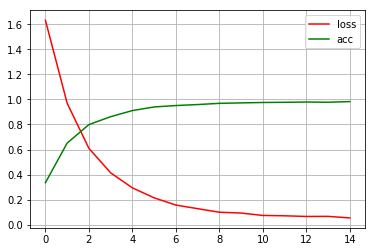

In [114]:
plt.grid(True)
plt.plot(historial.history['loss'],'r',label='loss')
plt.plot(historial.history['acc'],'g',label='acc')
plt.legend()
plt.show()

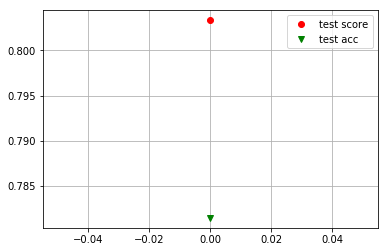

In [119]:
plt.grid(True)
plt.plot(evalue[0],'ro',label='test score')
plt.plot(evalue[1],'gv',label='test acc')
plt.legend()
plt.show()